{'USD': 3}


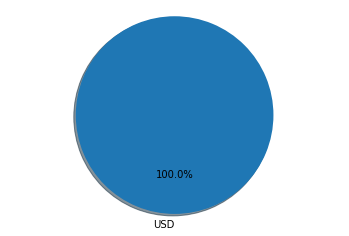

In [31]:
import matplotlib.pyplot as plt
import requests


class Portfolio():
    """docstring for Portfolio.
        Instance vars:
        params - passed into the API requests
        p - a json of the portfolio
        p_stocks - the list of stocks in the portfolio, and which ones are
        num_tickers - len(tickers)
     """

    def __init__(self, tickers_list):
        """
        tickers is a list of strings, each string being a ticker
        """
        # take list of tickers and convert into a string that can be passed into the API
        # end result example: "ticker:AAPL,ticker:MSFT,ticker:RKUNY"
        self.num_tickers = len(tickers_list)

        self.params = ''
        for ticker in tickers_list:
            self.params += "ticker:{},".format(ticker.upper())
        self.params = self.params[:-1]  # cut off the last comma

        portfolioAnalysisRequest = requests.get(
            "https://www.blackrock.com/tools/hackathon/security-data", params={'identifiers': self.params})
        self.p = portfolioAnalysisRequest.json  # get as json object
        self.p_stocks = (self.p)()['resultMap']["SECURITY"][:self.num_tickers] # cut off to take care of "duplicate" stocks that share the same ticker

    def get_counts(self, attr_string):
        """
        returns dictionary: {Security Attribute: Count}
        Security attribute is stuff like country, currency, etc
        country, currency, exchangeAcronym, issFtse1Industry, issFtse3Sector
        """

        a_counts = {}
        for stock in self.p_stocks:
            c = stock[attr_string]
            a_counts[c] = 1 + a_counts.get(c, 0)
        return a_counts

#available attributes to compare: country, currency, exchangeAcronym, issFtse1Industry, issFtse3Sector
attr = 'currency'

#change below to use different stocks in lookup
portfolio = ["aapl", 'MsFt', 'RKUNY']

counts = Portfolio(portfolio).get_counts(attr)
print(counts)


labels = tuple(counts)
explode = [0] * len(counts)

fig1, ax1 = plt.subplots()
ax1.pie(list(counts.values()), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()